In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

In [205]:
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [207]:
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [208]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing values for numerical columns with the median
df['Total Price'].fillna(df['Total Price'].median(), inplace=True)

# Fill missing values for categorical columns with the mode
df['Order Status'].fillna(df['Order Status'].mode()[0], inplace=True)

In [209]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [210]:
df.shape

(20000, 16)

In [211]:
#quantity by payment method
method_used = df.groupby('Payment Method')['Quantity'].sum().sort_values(ascending=False)
method_used

Payment Method
Credit Card      32031
Bank Transfer    18592
PayPal           18182
Paypal           13775
Debit Card       13668
Cash             13463
Name: Quantity, dtype: int64

In [212]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=method_used.index,
    y=method_used.values,
    name='Quantity by Payment Method'))

In [213]:
#most bought products
most_bought = df.groupby('Product Type')['Quantity'].sum().sort_values(ascending=False)
most_bought

Product Type
Smartphone    32660
Tablet        22653
Smartwatch    21631
Laptop        21584
Headphones    11183
Name: Quantity, dtype: int64

In [214]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=most_bought.index,
    y=most_bought.values,
    name='Quantity by Product Type'))

In [215]:
#trying to find out if there is a correlation between gender and quantity + gender and total price
gender_sales = df.groupby('Gender')['Total Price'].sum().sort_values(ascending=False)
gender_sales

Gender
Male      32188816.07
Female    31413177.98
Name: Total Price, dtype: float64

In [216]:
gender_sales_quantity = df.groupby('Gender')['Quantity'].sum().sort_values(ascending=False)
gender_sales_quantity

Gender
Male      55842
Female    53868
Name: Quantity, dtype: int64

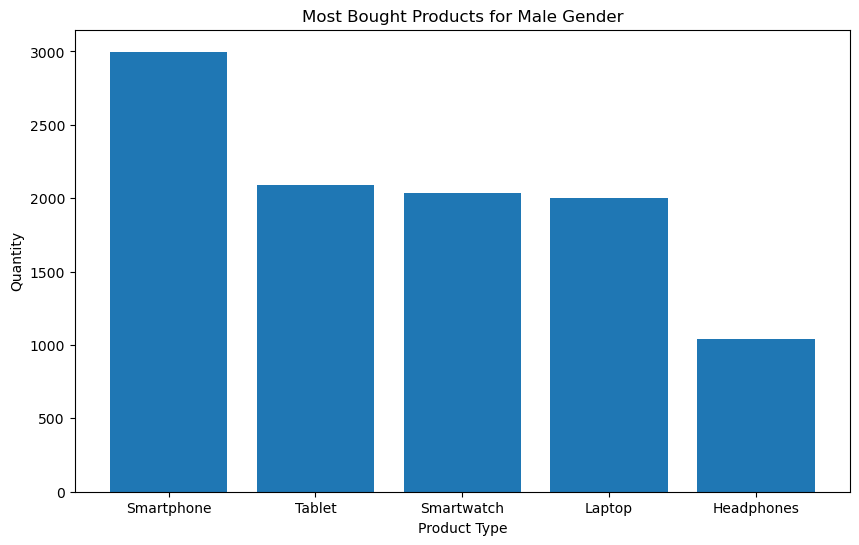

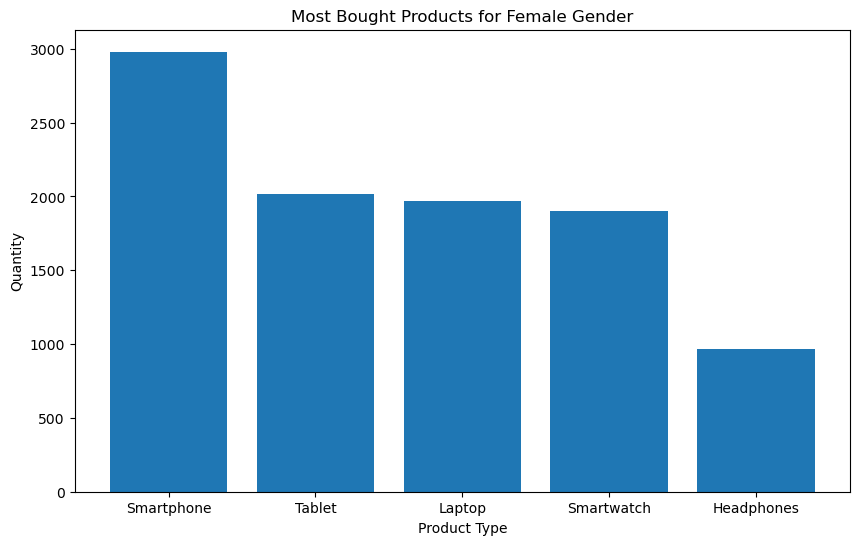

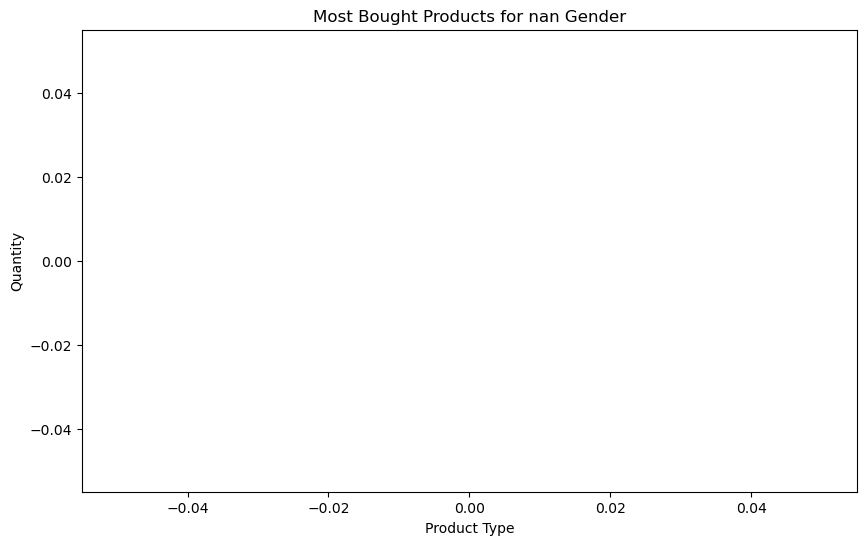

In [217]:
#what products are most bought by gender
gender_product = df.groupby(['Gender', 'Product Type'])['Quantity'].sum()
gender_product
#create a graph for each gender
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    product_counts = gender_data['Product Type'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(product_counts.index, product_counts.values)
    plt.title(f'Most Bought Products for {gender} Gender')
    plt.xlabel('Product Type')
    plt.ylabel('Quantity')

In [218]:
#trying to find out if there is a correlation between age and quantity
age_sales = df.groupby('Age')['Quantity'].sum().sort_values(ascending=False)
age_sales

Age
61    2051
50    1977
40    1977
39    1941
71    1938
      ... 
51    1492
76    1473
34    1459
46    1423
20    1393
Name: Quantity, Length: 63, dtype: int64

In [219]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=age_group_sales.index,
    y=age_group_sales.values,
    name='Total Price by Age Group'))

In [220]:
#orders by price
price_quantity = df.groupby('Unit Price')['Quantity'].sum().sort_values(ascending=False).head(10)
price_quantity

Unit Price
786.41     11339
247.03     11314
361.18     11178
791.19     11169
459.50     10999
1139.68    10926
674.32     10842
463.96     10739
844.83     10632
20.75      10554
Name: Quantity, dtype: int64

In [221]:
df['Price Group'] = pd.cut(df['Unit Price'], bins=[0, 100, 200, 300, 400, 500], labels=['0-100', '100-200', '200-300', '300-400', '400-500'])
price_group = df.groupby('Price Group')['Quantity'].sum().sort_values(ascending=False)
price_group
fig = go.Figure()
fig.add_trace(go.Bar(
    x=price_group.index,
    y=price_group.values,
    name='Quantity by Price Group'))

/var/folders/6h/4wfj5d_x18q0k8b3t4hlhv600000gn/T/ipykernel_29055/2654906285.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [222]:
#orders by shipping type
shipping_type = df.groupby('Shipping Type')['Quantity'].sum().sort_values(ascending=False)
shipping_type
fig = go.Figure()
fig.add_trace(go.Bar(
    x=shipping_type.index,
    y=shipping_type.values,
    name='Quantity by Shipping Type'))

In [223]:
#quantity by order status
order_status = df.groupby('Order Status')['Quantity'].sum().sort_values(ascending=False)
order_status
fig = go.Figure()
fig.add_trace(go.Bar(
    x=order_status.index,
    y=order_status.values,
    name='Quantity by Order Status'))

In [224]:
#most bought add-ons
add_ons = df.groupby('Add-ons Purchased')['Quantity'].sum().sort_values(ascending=False).head(5)
add_ons
fig = go.Figure()
fig.add_trace(go.Bar(
    x=add_ons.index,
    y=add_ons.values,
    name='Quantity by Add-ons Purchased'))

/var/folders/6h/4wfj5d_x18q0k8b3t4hlhv600000gn/T/ipykernel_29055/2161359439.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



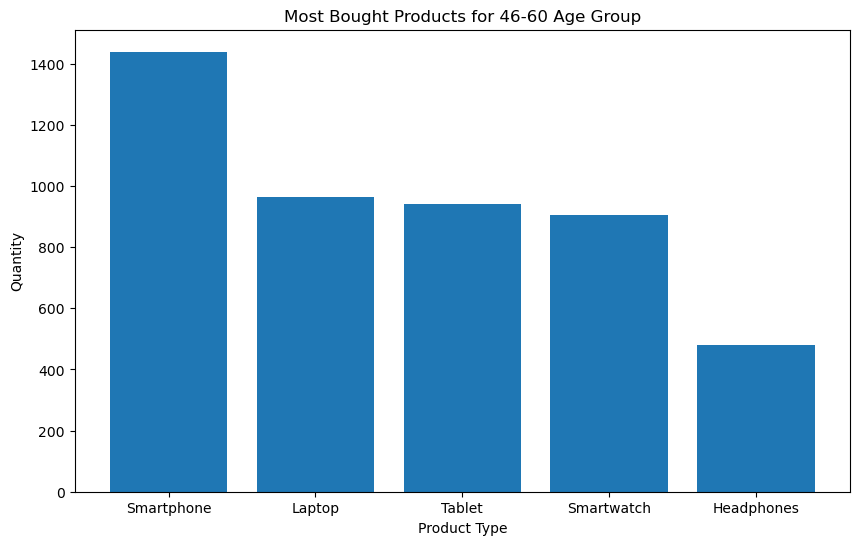

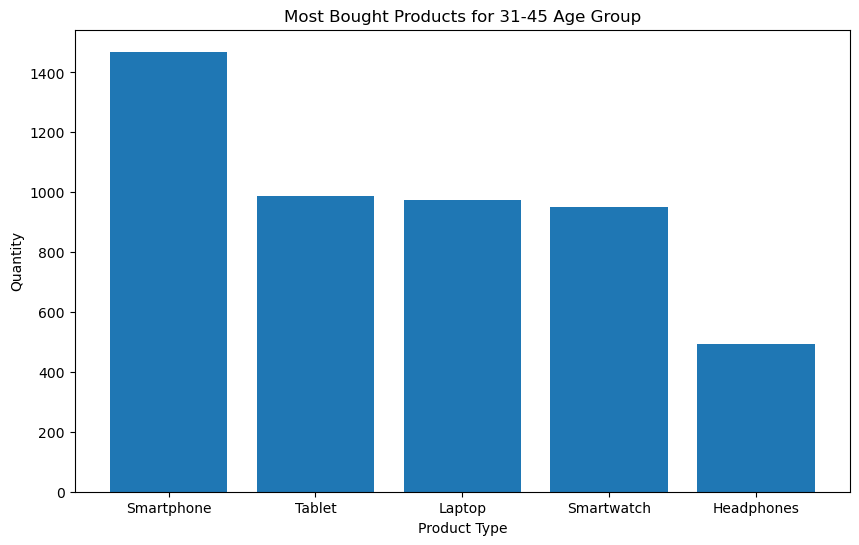

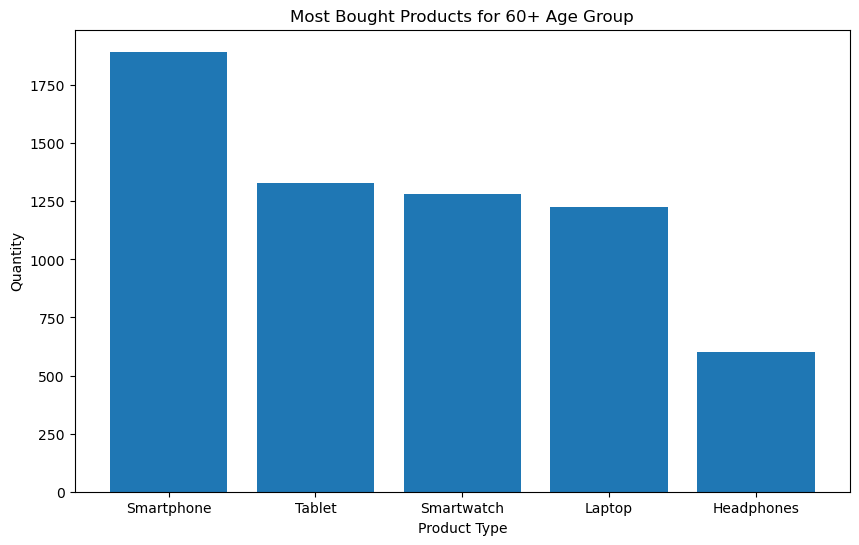

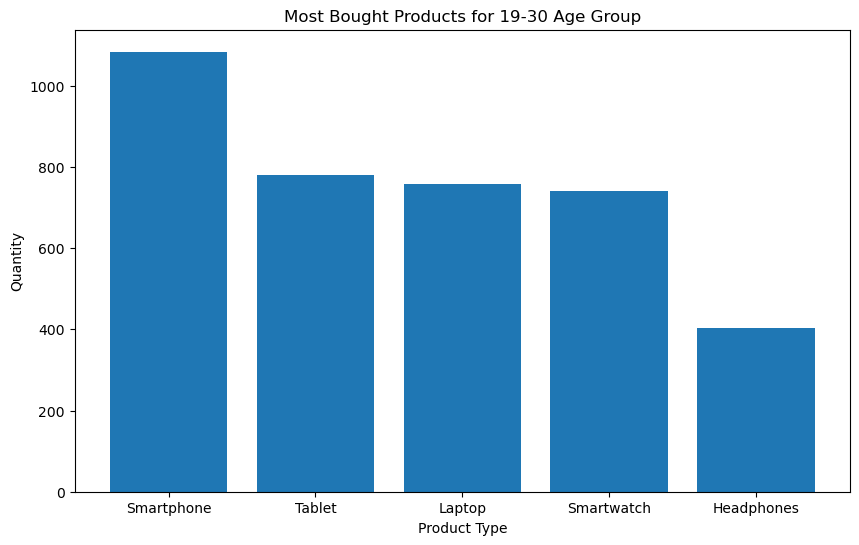

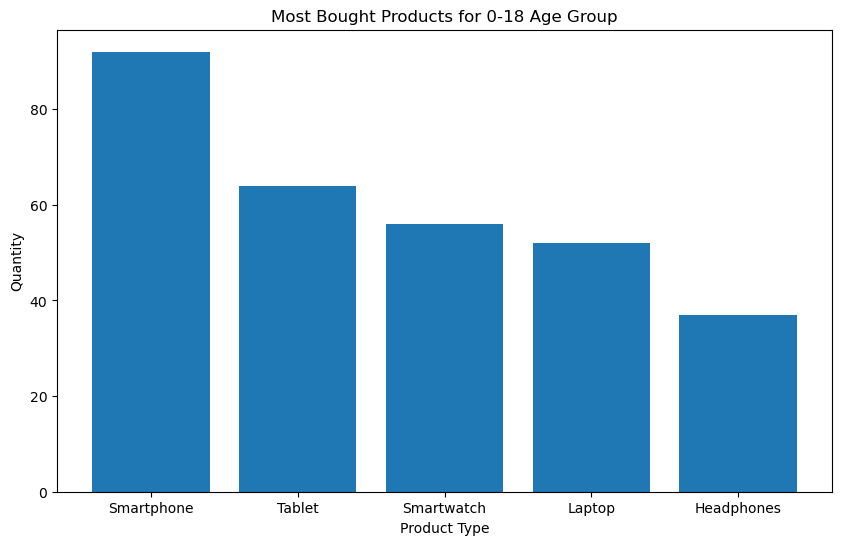

In [225]:
#create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])
#create most bought products by age group
age_product_group = df.groupby(['Age Group', 'Product Type'])['Quantity'].sum()
age_product_group
#create graph for each age group
for age_group in df['Age Group'].unique():
    age_group_data = df[df['Age Group'] == age_group]
    product_counts = age_group_data['Product Type'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(product_counts.index, product_counts.values)
    plt.title(f'Most Bought Products for {age_group} Age Group')
    plt.xlabel('Product Type')
    plt.ylabel('Quantity')


In [226]:
#what products were most cancelled
cancelled_orders = df[df['Order Status'] == 'Cancelled']
cancelled_orders
cancelled_products = cancelled_orders.groupby('Product Type')['Quantity'].sum().sort_values(ascending=False)
cancelled_products
fig = go.Figure()
fig.add_trace(go.Bar(
    x=cancelled_products.index,
    y=cancelled_products.values,
    name='Quantity by Product Type'))

In [227]:
#what was the most used payment method with smartphones
smartphone_orders = df[df['Product Type'] == 'Smartphone']
smartphone_orders
smartphone_payment = smartphone_orders.groupby('Payment Method')['Quantity'].sum().sort_values(ascending=False)
smartphone_payment
fig = go.Figure()
fig.add_trace(go.Bar(
    x=smartphone_payment.index,
    y=smartphone_payment.values,
    name='Quantity by Payment Method'))

In [228]:
#most bought add-on with smartphones
smartphone_addons = smartphone_orders.groupby('Add-ons Purchased')['Quantity'].sum().sort_values(ascending=False).head(5)
smartphone_addons
fig = go.Figure()
fig.add_trace(go.Bar(
    x=smartphone_addons.index,
    y=smartphone_addons.values,
    name='Quantity by Add-ons Purchased'))

In [229]:
#smartphone sales by age group
smartphone_age = smartphone_orders.groupby('Age Group')['Quantity'].sum().sort_values(ascending=False)
smartphone_age
fig = go.Figure()
fig.add_trace(go.Bar(
    x=smartphone_age.index,
    y=smartphone_age.values,
    name='Quantity by Age Group'))

/var/folders/6h/4wfj5d_x18q0k8b3t4hlhv600000gn/T/ipykernel_29055/817477045.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



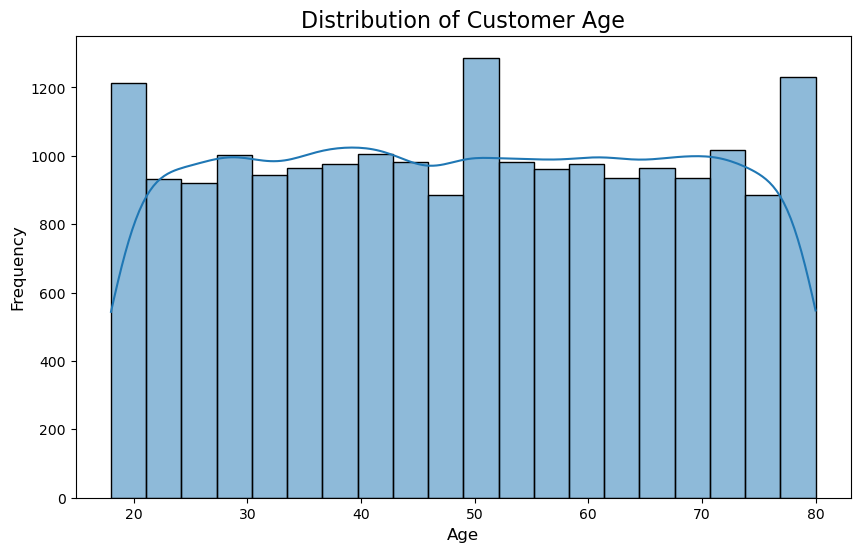

In [230]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()